<img src="./lecture_image/00_title.png">

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[5차시] 학습목표</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>
        
○ OpenCV를 활용한 이미지 처리 방법에 대해 학습한다.<br>
○ 칼라/흑백/이진 이미지의 픽셀값을 출력하고 픽셀값을 변경해본다.<br>
○ RGB 채널을 분리하고 병합해본다.
</font></td></tr>   
</table>

# 이미지 처리 기초

- 픽셀 기반 처리 : 이미지를 픽셀 단위로 처리하는 방법
  - 이미지의 특성으로 표현하는 데 한계가 있음, 이미지 처리 속도가 느림
- 블록 기반 처리 : 이미지를 블록 (픽셀을 그룹화한 것)  단위로 처리하는 방법
  - 이미지의 지역적 특성을 잘 표현, 이미지 속도가  빠름  필터링
- 주파수 기반 처리 : 이미지를  주파수 영역으로 변환하여 처리하는 방법
  - 이미지의 전역적 특성으로 잘 표현 - FFT, DCT, WT 등
  
  
- 픽셀 (pixel : picture cell)
  - 이미지를 구성하는 최소 단위 
  - 0-255의 값으로 구성 (검정색 0, 흰색 255)
  
  <img src="./lecture_image/05_pixel.png">
  
  
- 블럭 (block)
  - 근방의 픽셀을 그룹핑한 것  
  - 근방의 픽셀은 유사한 특성을 가진다는 것을 가정
  - 일반적으로 블럭간에 중복을 시켜서 처리 – 블럭간의 Locality반영
  
    <img src="./lecture_image/05_block.png" width=70%>
    
    
- 주파수 (frequency)
  -  주파수 (frequency) : 이미지 픽셀값들을 픽셀값의 변화분으로 변환한 것
  - 이미지에서 주파수 : 픽셀의 변화량
    - 고주파 성분 : 픽셀값의 변화가 큰 부분 (에지)
    - 저주파 성분 : 픽셀값의 변화가 작은 부분
  - 일반적인 이미지는 주로 저주파 성분으로 구성되어 있음
  - 이미지의 중요한 특성은 주로 고주파 성분에 존재

    <img src="./lecture_image/05_frequency.png" width=70%>

## 이미지 픽셀 값 출력

### 이진 이미지 픽셀 값 출력

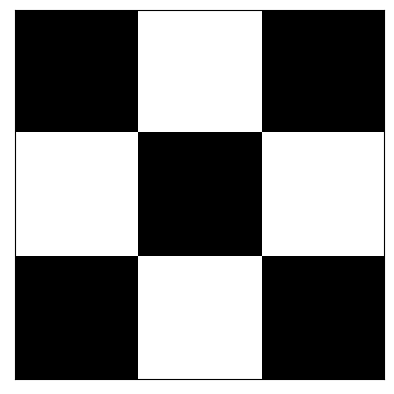

In [2]:
#실습
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./image/checkerboard_18x18.png", cv2.IMREAD_GRAYSCALE)

plt.xticks([]), plt.yticks([])
plt.imshow(img, cmap="gray")

- 이미지의 픽셀값은 0-255 사이 값으로 구성 (8bit 양의 정수 형태)
- 검정색은 0, 흰색은 255

In [3]:
#실습

print(img)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

### 그레이 이미지 픽셀 값 출력

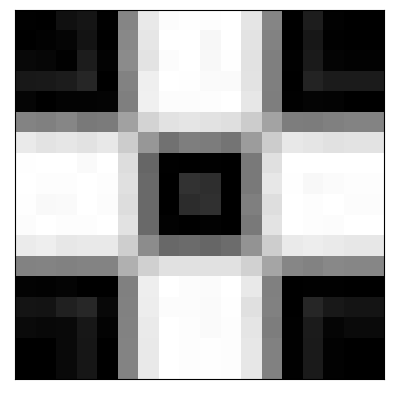

In [4]:
#실습

import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./image/checkerboard_fuzzy_18x18.jpg", cv2.IMREAD_GRAYSCALE)

plt.xticks([]), plt.yticks([])
plt.imshow(img, cmap="gray")

In [5]:
#실습

print(img)

[[  1   0  16  21   1 133 233 252 254 253 255 229 133   0  29   2   0   0]
 [  0   2   5  19   0 136 230 255 255 247 255 228 130   0  23   1   0   0]
 [  8   6   1  28   3 139 228 252 255 248 254 226 127   1  26   4   2   2]
 [ 24  25  28  38   0 130 239 255 254 250 250 228 127   0  35  27  27  27]
 [  5   0   3   3   4 127 240 252 252 253 255 231 126   1   4   3   0   0]
 [132 128 134 121 123 161 212 226 229 226 223 204 163 125 124 128 131 131]
 [234 228 230 226 232 204 151 114 126 124 116 156 204 232 229 225 228 228]
 [254 255 255 250 255 221 102   1   0   1   0 121 224 255 255 255 255 255]
 [255 253 253 255 253 224 105   0  50  46   0 121 231 254 248 251 253 253]
 [254 249 250 255 252 221 105   0  45  49   0 127 222 255 253 255 252 252]
 [252 255 253 253 255 226 106   2   0   2   0 122 228 255 253 252 255 255]
 [235 238 231 233 233 206 140 104 107 102 108 147 205 234 237 234 231 231]
 [130 131 129 131 132 176 208 225 225 225 225 209 165 134 130 136 134 134]
 [  3   2   4   0   0 128

In [6]:
print(img.shape)

(18, 18)


### 칼라 이미지 픽셀 값 출력

- 픽셀값 접근/변경
   -  픽셀값은 numpy 배열 형태로 접근하고 변경
     - img[200, 100] : 픽셀의 좌표
     - Red, Green, Blue 순으로 출력

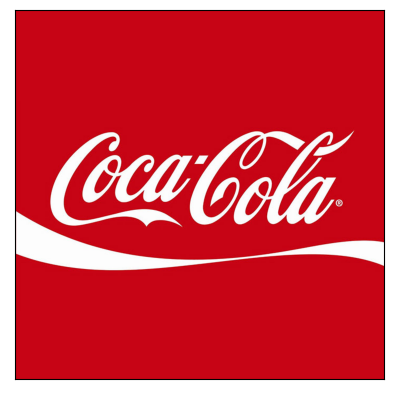

In [7]:
#실습

import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./image/coca-cola-logo.png", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.xticks([]), plt.yticks([])
plt.imshow(img)

In [9]:
#실습

print(img.shape)  #RGB는 3채널로 구성되어 있음을 확인 가능

(700, 700, 3)


In [19]:
# 픽셀값 : numpy array와 같은 방법으로 접근 가능

print(img[200, 100])  # 빨간색

print(img[400, 10])  # 흰색

[199   4  21]
[253 253 253]


<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=4>
○ 다른 이미지의 픽셀값을 출력해 보자.<br>
   </td></tr>   
</table>

## 픽셀값 변경

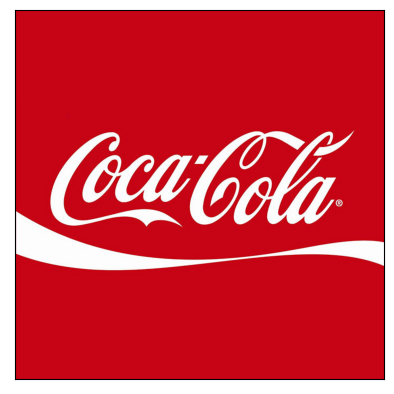

In [22]:
#실습

img[200, 100] = [0, 0, 255]

plt.xticks([]), plt.yticks([])
plt.imshow(img)  # Coca의 C 위쪽에 빨간색이 파란 점으로 바뀐 것을 확인 가능

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=4>
○ 다른 이미지의 픽셀값을 변경해 보자.<br>
   </td></tr>   
</table>

# RGB 채널 다루기

- 이미지 채널
     - 흑백은 1개의 채널 이미지로 구성되고, 칼라는 Red, Green, Blue 3개의 채널 이미지로 구성

    <img src="./lecture_image/05_image_channel.png" width=50%>

## RGB 채널 분리하기

- <font color=red>변수 = img[:, :, 채널번호]</font>

  - img[:, :, 0] : red 채널
  - img[:, :, 1] : green 채널
  - img[:, :, 2] : blue 채널

In [7]:
#실습

- 흰색이 가까울수록 픽셀 수가 많다는 것을 의미

## RGB 채널 합치기

- cv2.merge((r, g, b) : RGB 각 채널을 합침

In [8]:
#실습

## 픽셀값을 RGB 채널 값을 이용해서 변경하기

- <font color=red>img.itemset((x, y, 0), 0)</font>
  - itemset((픽셀y위치, 픽셀x위치, 채널), 색상레벨)
  - 채널 (0 : Red, 1 : Green, 2 : Blue)  
  - 0번 채널의 (x, y) 픽셀의 값을 0으로 변경  

In [9]:
#실습

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=4>
○ 다른 채널의 픽셀값을 변경해 보자.<br>
   </td></tr>   
</table>

# 이미지의 속성 출력

- img.shape : 이미지의 크기 및 채널 
- img.size : 이미지의 전체 픽셀 수
- img.dtype : 데이터 타입

In [24]:
#실습

print(img.shape)

(700, 700, 3)


In [25]:
print(img.size)

1470000


In [26]:
print(img.dtype) # uint8 : unsigned int 8

uint8


<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[5차시] 학습요약</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>
        
○ 이미지 처리 방법 : 픽셀기반, 블록기반, 주파수 기반 처리<br>
○ 이미지의 픽셀값은 0-255 사이 값으로 구성 (8bit 양의 정수 형태) - 검정색은 0, 흰색은 255<br>
○ 픽셀값은 3차원 배열 형태로 접근 ([x축, y축, 채널])<br>
○ <font color=red>itemset((x축, y축, 채널), 값)</font> : 해당 채널의 픽셀값을 변경<br><br>

○ <font color=red>img.shape</font> : 이미지 크기<br>
○ <font color=red>img.size</font> : 전체 픽셀 수<br>
○ <font color=red>img.dtype</font> : 데이터 타입
        
</font></td></tr>   
</table>